In [12]:
#import data
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [13]:
#support vector machine
#image process
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math, time
import pandas as pd
from sklearn.model_selection import train_test_split
x_train = pd.read_csv('mnist_train.csv', sep=',')
x_pro=x_train.iloc[0:2000,1:]
y_pro=x_train.iloc[0:2000, 0]
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(x_pro,y_pro,test_size=0.25, random_state=5, stratify=y_pro)

(array([1001., 1127.,  991., 1032.,  980.,  863., 1014., 1070.,  944.,
         978.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

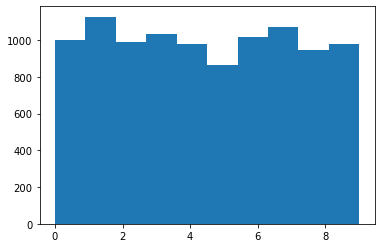

In [16]:
sample_test=Y_train.tolist()[0:10000]
distribution = {i:sample_test.count(i) for i in sample_test}
#print(distribution)
plt.hist(sample_test, 10)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
support_pro = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipe=Pipeline(support_pro)
setting = {'SVM__C':[0.001, 0.1, 100, 10^7], 'SVM__gamma':[10,1,0.1,0.01]}
d = GridSearchCV(pipe, param_grid=setting, cv=4)
d.fit(X_train_final, y_train_final)
print("accuracy = %3.2f" %(d.score(X_test_final, y_test_final)))
print("best setting: ", d.best_params_)

accuracy = 0.89
best setting:  {'SVM__C': 0.001, 'SVM__gamma': 10}


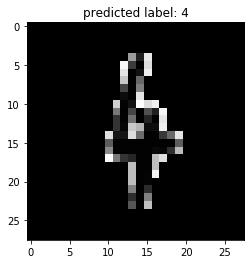

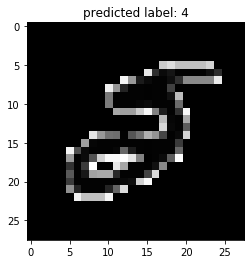

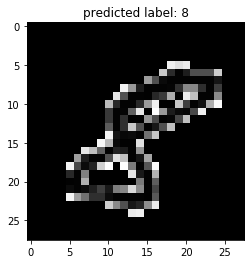

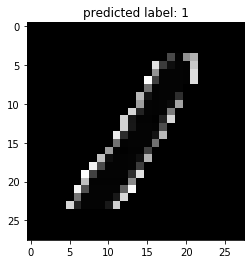

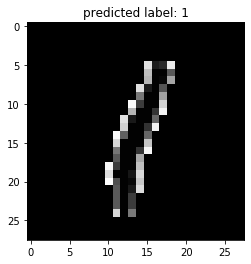

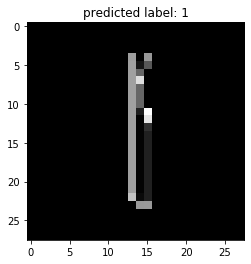

In [18]:
y_predict=d.predict(X_test_final)
for i in (np.random.randint(0,220,6)):
 two_d = (np.reshape(X_test_final.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_predict[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [27]:
(TrainX,Trainy),(TestX,Testy)=tf.keras.datasets.mnist.load_data()
trialone=TrainX.reshape(TrainX.shape[0],TrainX.shape[1]*TrainX.shape[2])
kernel_ytrain=Trainy[0:2000]
kernel_xtrain_step_1=trialone[0:2000,:]
kernel_xtrain=kernel_xtrain_step_1.reshape(2000,28,28,1)
kernel_xtest=TestX.reshape(TestX.shape[0],28,28,1)
kernel_xtrain=kernel_xtrain.astype('float32');kernel_xtrain /=255
kernel_xtest=kernel_xtest.astype('float32');kernel_xtest/= 255
shape=(28,28,1)

In [28]:
kernel_model=Sequential()
kernel_model.add(Conv2D(28,kernel_size=(3,3),input_shape=shape))
kernel_model.add(MaxPooling2D(pool_size=(2,2)))
kernel_model.add(Flatten())
kernel_model.add(Dense(128,activation=tf.nn.relu))
kernel_model.add(Dropout(0.2))
kernel_model.add(Dense(10,activation=tf.nn.softmax))

In [29]:
kernel_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
kernel_model.fit(x=kernel_xtrain,y=kernel_ytrain,epochs=10)

Train on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.9036 - accuracy: 0.7245
Epoch 2/10
2000/2000 [==============================] - 2s 992us/sample - loss: 0.3781 - accuracy: 0.8870
Epoch 3/10
2000/2000 [==============================] - 2s 990us/sample - loss: 0.2859 - accuracy: 0.9165
Epoch 4/10
2000/2000 [==============================] - 2s 987us/sample - loss: 0.2156 - accuracy: 0.9370
Epoch 5/10
2000/2000 [==============================] - 2s 984us/sample - loss: 0.1835 - accuracy: 0.9475
Epoch 6/10
2000/2000 [==============================] - 2s 989us/sample - loss: 0.1419 - accuracy: 0.9525
Epoch 7/10
2000/2000 [==============================] - 2s 986us/sample - loss: 0.1204 - accuracy: 0.9620
Epoch 8/10
2000/2000 [==============================] - 2s 988us/sample - loss: 0.1079 - accuracy: 0.9680
Epoch 9/10
2000/2000 [==============================] - 2s 992us/sample - loss: 0.0883 - accuracy: 0.9730
Epoch 10/10
2000/2000 [===

In [30]:
kernel_model.evaluate(kernel_xtest,Testy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3096475367300212, 0.9148]

In [32]:
#K means clustering
#prepare
cluster_process=TrainX.reshape(60000,784)
select_cluster=cluster_process[0:2000,:]
cluster_process_two=select_cluster.reshape(2000,28,28)
X=cluster_process_two.reshape(len(cluster_process_two),-1)
X=X.astype(float)/255
Y=kernel_ytrain

In [33]:
from sklearn.cluster import MiniBatchKMeans

In [34]:
label_number=len(np.unique(Testy))
print(label_number)

10


In [35]:
kmean_model=MiniBatchKMeans(n_clusters=label_number)
kmean_model.fit(X)
len(kmean_model.labels_)

2000

In [65]:
def cluster_label(kmean_model, reaL): 
    inferred = {}
    for i in range(kmean_model.n_clusters):
        labels = []
        I = np.where(kmean_model.labels_ == i)
        labels.append(reaL[I])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred:
            inferred[np.argmax(counts)].append(i)
        else:
            inferred[np.argmax(counts)] = [i]
        
    return inferred  

def data_label(X_labels, cluster_labels):
    predictedL = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predictedL[i] = key
                
    return predictedL

In [66]:
from sklearn import metrics
def cluster_number(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))

In [67]:
clusters = [10, 20, 30, 50, 100]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    cluster_number(estimator, X, Y)
    cluster_labels = cluster_label(estimator, Y)
    predicted_Y = data_label(estimator.labels_, cluster_labels)
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Accuracy: 0.556

Number of Clusters: 20
Accuracy: 0.642

Number of Clusters: 30
Accuracy: 0.7445

Number of Clusters: 50
Accuracy: 0.765

Number of Clusters: 100
Accuracy: 0.822



In [74]:
cluster_process_test=TestX.reshape(10000,784)
X_test_cluster = cluster_process_test.reshape(len(cluster_process_test),-1)
X_test_cluster = X_test_cluster.astype(float) / 255.
examine = MiniBatchKMeans(n_clusters = 100)
examine.fit(X)
cluster_labels_examine = cluster_label(examine, Y)
cluster_test = examine.predict(X_test_cluster)
predicted = data_label(examine.predict(X_test_cluster), cluster_labels_examine)
print('Accuracy: {}\n'.format(metrics.accuracy_score(Testy, predicted)))

Accuracy: 0.8027

